In [ ]:
import pandas as pd
import numpy as np
#from datetime import datetime, timedelta


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#path = Path().cwd()

import pathlib
p=pathlib.Path(r'drive/MyDrive/Colab Notebooks/Healthcare Project/')
#p = pathlib.Path(r'C:/Users/Dell/Documents/Lab6/')
fname =  p / 'final_ML.csv' # None # use p to create a path to the data 

df = pd.read_csv(fname)

# df_train = pd.read_csv(fname)
df.head()

,s.no,Exam,Student,ACC,TEMP,HR,IBI,EDA,BVP,Marks
0,0,Midterm 1,S1,65.12875,21.89,1.00,0.468771,0.011852,20.111563,78
1,1,Midterm 1,S1,65.16000,21.89,116.00,0.500023,0.023064,-14.726250,78
2,2,Midterm 1,S1,65.12875,21.91,82.50,0.375017,0.023704,-33.097031,78
3,3,Midterm 1,S1,65.09750,21.91,96.33,0.437520,0.023384,-4.302500,78
4,4,Midterm 1,S1,65.12875,21.89,86.25,0.468771,0.023704,31.872969,78


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['ACC', 'TEMP', 'HR', 'IBI', 'EDA', 'BVP']])
array_mean = imputer.transform(df[['ACC', 'TEMP', 'HR', 'IBI', 'EDA', 'BVP']])

In [ ]:
df_mean = pd.DataFrame(array_mean, columns=['ACC', 'TEMP', 'HR', 'IBI', 'EDA', 'BVP'])
df_mean.head()

,ACC,TEMP,HR,IBI,EDA,BVP
0,65.12875,21.89,1.00,0.468771,0.011852,20.111563
1,65.16000,21.89,116.00,0.500023,0.023064,-14.726250
2,65.12875,21.91,82.50,0.375017,0.023704,-33.097031
3,65.09750,21.91,96.33,0.437520,0.023384,-4.302500
4,65.12875,21.89,86.25,0.468771,0.023704,31.872969


In [ ]:
df_mean.insert(0, 'Exam', df['Exam'])

In [ ]:
df_mean.insert(1, 'Student', df['Student'])

In [ ]:
df_mean.insert(8, 'Marks', df['Marks'])

In [ ]:
df_mean.head()

,Exam,Student,ACC,TEMP,HR,IBI,EDA,BVP,Marks
0,Midterm 1,S1,65.12875,21.89,1.00,0.468771,0.011852,20.111563,78
1,Midterm 1,S1,65.16000,21.89,116.00,0.500023,0.023064,-14.726250,78
2,Midterm 1,S1,65.12875,21.91,82.50,0.375017,0.023704,-33.097031,78
3,Midterm 1,S1,65.09750,21.91,96.33,0.437520,0.023384,-4.302500,78
4,Midterm 1,S1,65.12875,21.89,86.25,0.468771,0.023704,31.872969,78


In [ ]:
df = df_mean

In [ ]:
#Midterm 1 Dataframe
mid1_df = df[df['Exam'] == 'Midterm 1']
print(mid1_df.shape)
#Midterm 2 Dataframe
mid2_df = df[df['Exam'] == 'Midterm 2']
print(mid2_df.shape)
# Final Exam Dataframe
final_exam_df = df[df['Exam'] == 'Final']
print(final_exam_df.shape)

(204464, 9)
(204464, 9)
(204464, 9)


In [ ]:
df.columns

Index(['Exam', 'Student', 'ACC', 'TEMP', 'HR', 'IBI', 'EDA', 'BVP', 'Marks'], dtype='object')

In [ ]:
df.isnull().sum()

Exam       0
Student    0
ACC        0
TEMP       0
HR         0
IBI        0
EDA        0
BVP        0
Marks      0
dtype: int64

In [ ]:
# df.fillna(df.mean(), inplace=True)

In [ ]:
X_mid1 = mid1_df[['ACC', 'TEMP', 'HR', 'IBI','EDA','BVP']]
y_mid1 = mid1_df['Marks']

In [ ]:
X_mid2 = mid2_df[['ACC', 'TEMP', 'HR', 'IBI','EDA','BVP']]
y_mid2 = mid2_df['Marks']

In [ ]:
X_final_exam = final_exam_df[['ACC', 'TEMP', 'HR', 'IBI','EDA','BVP']]
y_final_exam = final_exam_df['Marks']

In [ ]:
print(X_final_exam.shape)
print(y_final_exam.shape)

(204464, 6)
(204464,)


In [ ]:
# X = df[['ACC', 'TEMP', 'HR', 'IBI','EDA','BVP']]
# y = df['Marks']

In [ ]:
X_mid1_train, X_mid1_test, y_mid1_train, y_mid1_test = train_test_split(X_mid1, y_mid1, test_size=0.2)
X_mid2_train, X_mid2_test, y_mid2_train, y_mid2_test = train_test_split(X_mid2, y_mid2, test_size=0.2)
X_final_exam_train, X_final_exam_test, y_final_exam_train, y_final_exam_test = train_test_split(X_final_exam, y_final_exam, test_size=0.2)

In [ ]:
print(X_final_exam_train.shape)
print(X_final_exam_test.shape)
print(y_final_exam_train.shape)
print(y_final_exam_test.shape)

(163571, 6)
(40893, 6)
(163571,)
(40893,)


In [ ]:
rf_mid1 = RandomForestClassifier(n_estimators=50)
rf_mid2 = RandomForestClassifier(n_estimators=50)
rf_final_exam = RandomForestClassifier(n_estimators=50)

In [ ]:
rf_mid1.fit(X_mid1_train, y_mid1_train)
rf_mid2.fit(X_mid2_train, y_mid2_train)
rf_final_exam.fit(X_final_exam_train, y_final_exam_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
validation_predictions_mid1 = rf_mid1.predict(X_mid1_test)
validation_predictions_mid2 = rf_mid2.predict(X_mid2_test)
validation_predictions_final_exam = rf_final_exam.predict(X_final_exam_test)

In [ ]:
validation_e_mid1 = accuracy_score(y_mid1_test, validation_predictions_mid1)
validation_e_mid2 = accuracy_score(y_mid2_test, validation_predictions_mid2)
validation_e_final_exam = accuracy_score(y_final_exam_test, validation_predictions_final_exam)


print(f"{validation_e_mid1*100:.2f}% correct for Midterm 1")
print(f"{validation_e_mid2*100:.2f}% correct for Midterm 2")
print(f"{validation_e_final_exam*100:.2f}% correct for Final Exam")

97.42% correct for Midterm 1
97.50% correct for Midterm 2
97.51% correct for Final Exam


In [ ]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_mid1_dtc = DecisionTreeClassifier(max_depth=5)
model_mid2_dtc = DecisionTreeClassifier(max_depth=5)
model_final_dtc = DecisionTreeClassifier(max_depth=5)
model_mid1_dtc.fit(X_mid1_train, y_mid1_train)
model_mid2_dtc.fit(X_mid2_train, y_mid2_train)
model_final_dtc.fit(X_final_exam_train, y_final_exam_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
mid1_dtc_score=model_mid1_dtc.score(X_mid1_train, y_mid1_train)
mid2_dtc_score=model_mid2_dtc.score(X_mid2_train, y_mid2_train)
final_dtc_score=model_final_dtc.score(X_final_exam_train, y_final_exam_train)

print(f"{mid1_dtc_score*100:.2f}% correct for Midterm 1")
print(f"{mid2_dtc_score*100:.2f}% correct for Midterm 2")
print(f"{final_dtc_score*100:.2f}% correct for Final Exam")

68.18% correct for Midterm 1
64.66% correct for Midterm 2
68.07% correct for Final Exam


In [ ]:
validation_predictions_mid1_dtc = model_mid1_dtc.predict(X_mid1_test)
validation_predictions_mid2_dtc = model_mid2_dtc.predict(X_mid2_test)
validation_predictions_final_exam_dtc = model_final_dtc.predict(X_final_exam_test)

In [ ]:
validation_e_mid1_dtc = accuracy_score(y_mid1_test, validation_predictions_mid1_dtc)
validation_e_mid2_dtc = accuracy_score(y_mid2_test, validation_predictions_mid2_dtc)
validation_e_final_exam_dtc = accuracy_score(y_final_exam_test, validation_predictions_final_exam_dtc)

print(f"{validation_e_mid1_dtc*100:.2f}% correct for Midterm 1")
print(f"{validation_e_mid2_dtc*100:.2f}% correct for Midterm 2")
print(f"{validation_e_final_exam_dtc*100:.2f}% correct for Final Exam")

68.17% correct for Midterm 1
64.88% correct for Midterm 2
68.51% correct for Final Exam


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model_xgbc_mid1 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgbc_mid2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgbc_final = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgbc_mid1.fit(X_mid1_train, y_mid1_train)
model_xgbc_mid2.fit(X_mid2_train, y_mid2_train)
model_xgbc_final.fit(X_final_exam_train, y_final_exam_train)

XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [ ]:
mid1_xgbc_score=model_xgbc_mid1.score(X_mid1_train, y_mid1_train)
mid2_xgbc_score=model_xgbc_mid2.score(X_mid2_train, y_mid2_train)
final_xgbc_score=model_xgbc_final.score(X_final_exam_train, y_final_exam_train)

print(f"{mid1_xgbc_score*100:.2f}% correct for Midterm 1")
print(f"{mid2_xgbc_score*100:.2f}% correct for Midterm 2")
print(f"{final_xgbc_score*100:.2f}% correct for Final Exam")

85.90% correct for Midterm 1
85.30% correct for Midterm 2
85.88% correct for Final Exam


In [ ]:
print(model_xgbc_mid1.score(X_mid1_train, y_mid1_train))
print(model_xgbc_mid2.score(X_mid2_train, y_mid2_train))
print(model_xgbc_final.score(X_final_exam_train, y_final_exam_train))

0.8590275782381963
0.8529690470804727
0.8587952632190302


In [ ]:
validation_predictions_mid1_xgbc = model_xgbc_mid1.predict(X_mid1_test)
validation_predictions_mid2_xgbc = model_xgbc_mid2.predict(X_mid2_test)
validation_predictions_final_exam_xgbc = model_xgbc_final.predict(X_final_exam_test)

In [ ]:
validation_e_mid1_xgbc = accuracy_score(y_mid1_test, validation_predictions_mid1_xgbc)
validation_e_mid2_xgbc = accuracy_score(y_mid2_test, validation_predictions_mid2_xgbc)
validation_e_final_exam_xgbc = accuracy_score(y_final_exam_test, validation_predictions_final_exam_xgbc)

print(f"{validation_e_mid1_xgbc*100:.2f}% correct for Midterm 1")
print(f"{validation_e_mid2_xgbc*100:.2f}% correct for Midterm 2")
print(f"{validation_e_final_exam_xgbc*100:.2f}% correct for Final Exam")

85.55% correct for Midterm 1
85.11% correct for Midterm 2
85.91% correct for Final Exam


In [ ]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model6_knn_mid1 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model6_knn_mid2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model6_knn_final = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model6_knn_mid1.fit(X_mid1_train, y_mid1_train)
model6_knn_mid2.fit(X_mid2_train, y_mid2_train)
model6_knn_final.fit(X_final_exam_train, y_final_exam_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
mid1_knn_score=model6_knn_mid1.score(X_mid1_train, y_mid1_train)
mid2_knn_score=model6_knn_mid2.score(X_mid2_train, y_mid2_train)
final_knn_score=model6_knn_final.score(X_final_exam_train, y_final_exam_train)

print(f"{mid1_knn_score*100:.2f}% correct for Midterm 1")
print(f"{mid2_knn_score*100:.2f}% correct for Midterm 2")
print(f"{final_knn_score*100:.2f}% correct for Final Exam")

74.81% correct for Midterm 1
75.75% correct for Midterm 2
74.82% correct for Final Exam


In [ ]:
validation_predictions_mid1_knn = model6_knn_mid1.predict(X_mid1_test)
validation_predictions_mid2_knn = model6_knn_mid2.predict(X_mid2_test)
validation_predictions_final_exam_knn = model6_knn_final.predict(X_final_exam_test)

In [ ]:
validation_e_mid1_knn = accuracy_score(y_mid1_test, validation_predictions_mid1_knn)
validation_e_mid2_knn = accuracy_score(y_mid2_test, validation_predictions_mid2_knn)
validation_e_final_exam_knn = accuracy_score(y_final_exam_test, validation_predictions_final_exam_knn)

print(f"{validation_e_mid1_knn*100:.2f}% correct for Midterm 1")
print(f"{validation_e_mid2_knn*100:.2f}% correct for Midterm 2")
print(f"{validation_e_final_exam_knn*100:.2f}% correct for Final Exam")

66.79% correct for Midterm 1
67.91% correct for Midterm 2
66.38% correct for Final Exam


Text(0, 0.5, 'Accuracy')

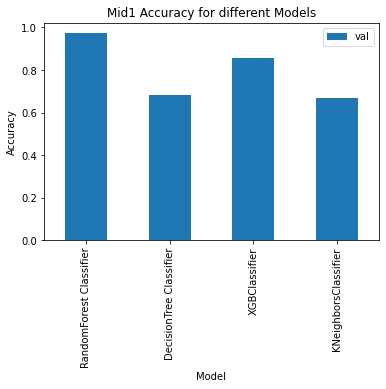

In [ ]:
df_mid1 = pd.DataFrame({'Model':['RandomForest Classifier', 'DecisionTree Classifier', 'XGBClassifier','KNeighborsClassifier'], 'val':[validation_e_mid1, validation_e_mid1_dtc, validation_e_mid1_xgbc,validation_e_mid1_knn]})
from matplotlib import pyplot as plt
df_mid1.plot(x='Model', y='val', kind="bar")
plt.title("Mid1 Accuracy for different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

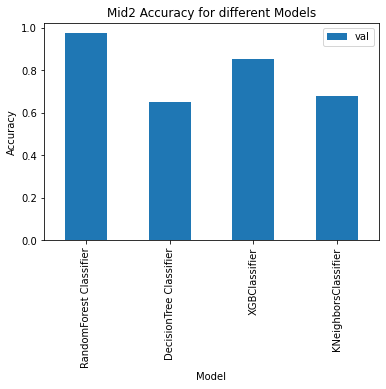

In [ ]:
df_mid2 = pd.DataFrame({'Model':['RandomForest Classifier', 'DecisionTree Classifier', 'XGBClassifier','KNeighborsClassifier'], 'val':[validation_e_mid2, validation_e_mid2_dtc, validation_e_mid2_xgbc,validation_e_mid2_knn]})
from matplotlib import pyplot as plt
df_mid2.plot(x='Model', y='val', kind="bar")
plt.title("Mid2 Accuracy for different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

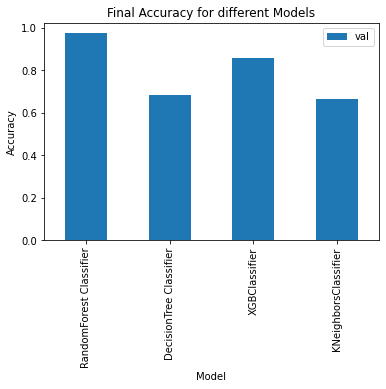

In [ ]:
df_final = pd.DataFrame({'Model':['RandomForest Classifier', 'DecisionTree Classifier', 'XGBClassifier','KNeighborsClassifier'], 'val':[validation_e_final_exam, validation_e_final_exam_dtc, validation_e_final_exam_xgbc,validation_e_final_exam_knn]})
from matplotlib import pyplot as plt
df_final.plot(x='Model', y='val', kind="bar")
plt.title("Final Accuracy for different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")